In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:


# Load data from the first worksheet
data_2019 = pd.read_excel(r"C:\Users\augus\OneDrive\Desktop\js\Cargo predict\datas\dataset\Agro products_ 2018 to 2022.xlsx", sheet_name="2019")

data_2019

,Sail Date.,QTY.(KGS)
0,2019-01-01 00:00:00,20000
1,2019-01-01 00:00:00,52260
2,2019-01-01 00:00:00,15000
3,2019-01-01 00:00:00,21325
4,2019-01-01 00:00:00,19325
...,...,...
11719,31-12-2019,15000
11720,31-12-2019,17433
11721,31-12-2019,14560
11722,31-12-2019,17433


In [63]:
data_2019.shape

(11724, 2)

In [64]:
data_2019.dropna(inplace=True) 
data_2019.shape

(11724, 2)

In [65]:


if pd.api.types.is_datetime64_any_dtype(data_2019['Sail Date.']):
    # Sort the DataFrame based on the 'Sail Date' column
     data_2019.sort_values(by='Sail Date.')


data_2019

,Sail Date.,QTY.(KGS)
0,2019-01-01 00:00:00,20000
1,2019-01-01 00:00:00,52260
2,2019-01-01 00:00:00,15000
3,2019-01-01 00:00:00,21325
4,2019-01-01 00:00:00,19325
...,...,...
11719,31-12-2019,15000
11720,31-12-2019,17433
11721,31-12-2019,14560
11722,31-12-2019,17433


In [66]:
data_2019['Sail Date.'] = pd.to_datetime(data_2019['Sail Date.'])

In [67]:
data_2019.to_csv('c_data_19.csv', index=False)

In [68]:
data_2019['Sail Date.'] = pd.to_datetime(data_2019['Sail Date.'])

# Group by 'Sail Date' and sum the 'QTY.(KGS)' column
daily_sales= data_2019.groupby(data_2019['Sail Date.'].dt.date)['QTY.(KGS)'].sum().reset_index()

# Display the resulting table
print(daily_sales)



     Sail Date.  QTY.(KGS)
0    2019-01-01     686993
1    2019-01-02    1920106
2    2019-01-03    1598395
3    2019-01-04    1621244
4    2019-01-05     148152
..          ...        ...
276  2019-12-26    2004698
277  2019-12-27     643626
278  2019-12-29     392141
279  2019-12-30    1054901
280  2019-12-31    1088381

[281 rows x 2 columns]


In [69]:
data_2019.shape

(11724, 2)

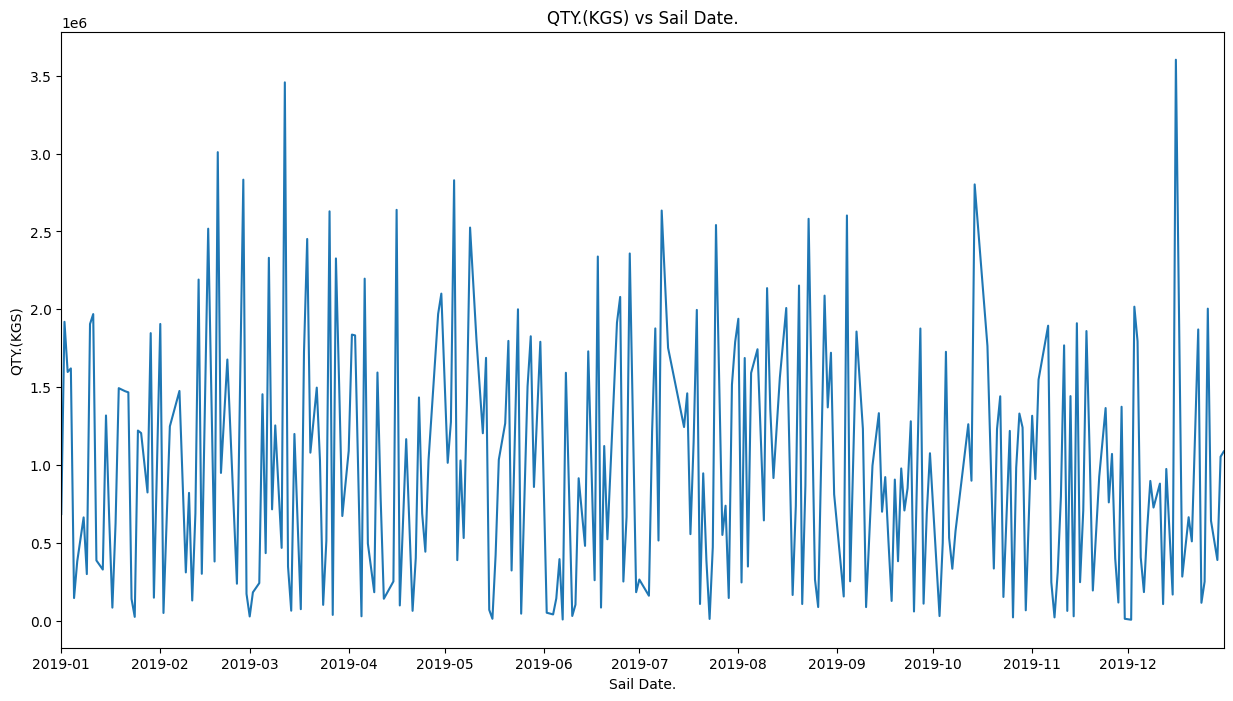

In [70]:

plt.figure(figsize=(15,8))
plt.plot(daily_sales['Sail Date.'], daily_sales['QTY.(KGS)'])
plt.xlabel('Sail Date.')
plt.ylabel('QTY.(KGS)')
plt.title('QTY.(KGS) vs Sail Date.')
plt.xlim(daily_sales['Sail Date.'].min(), daily_sales['Sail Date.'].max())
plt.show()


In [71]:
duplicate_rows = data_2019[data_2019.duplicated()]

# Display the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 2915


In [72]:
if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Extract year and month from the 'Sail Date.' column
    daily_sales['Month'] = daily_sales['Sail Date.'].dt.month

    # Iterate over each month
    for month in range(1, 13):
        # Filter the data for the current month
        month_data = daily_sales[daily_sales['Month'] == month]

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Month {month}')
        plt.xlabel('Sail Date.')
        plt.ylabel('Quantity Shipped (KGS)')
        plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


Error: 'Sail Date.' column could not be converted to datetime.


In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if the column containing the date information is datetime
if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Extract year and month from the 'Sail Date.' column
    daily_sales['Month'] = daily_sales['Sail Date.'].dt.month

    # Iterate over each month
    for month in range(1, 13):
        # Filter the data for the current month
        month_data = daily_sales[daily_sales['Month'] == month]

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Month {month}')
        plt.xlabel('Sail Date.')
        plt.ylabel('Quantity Shipped (KGS)')
        plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


Error: 'Sail Date.' column could not be converted to datetime.


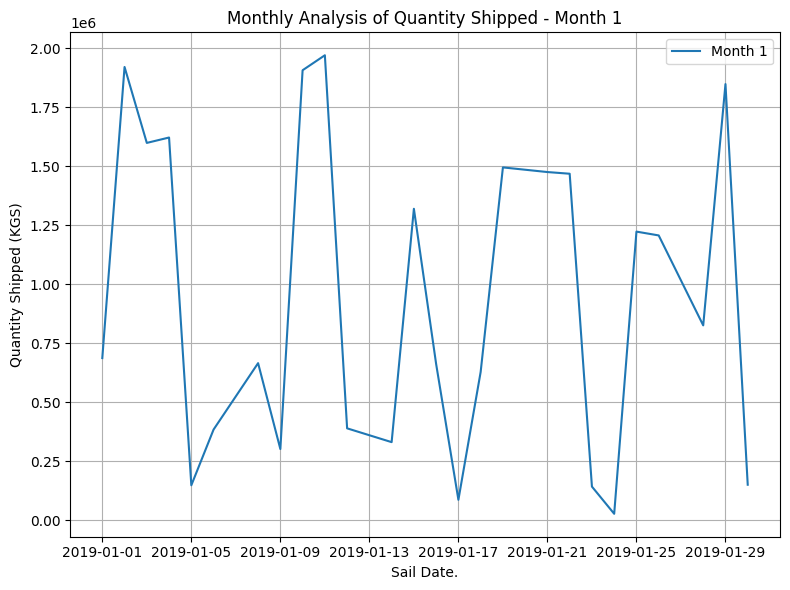

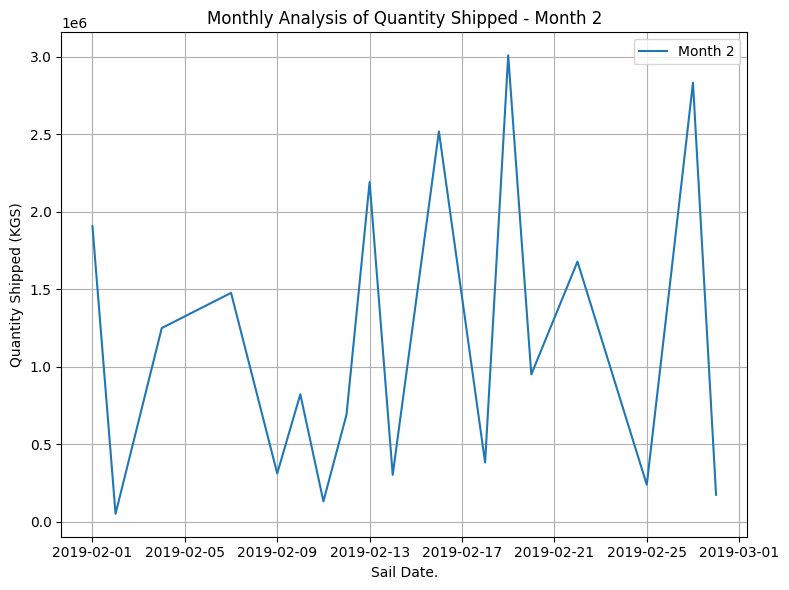

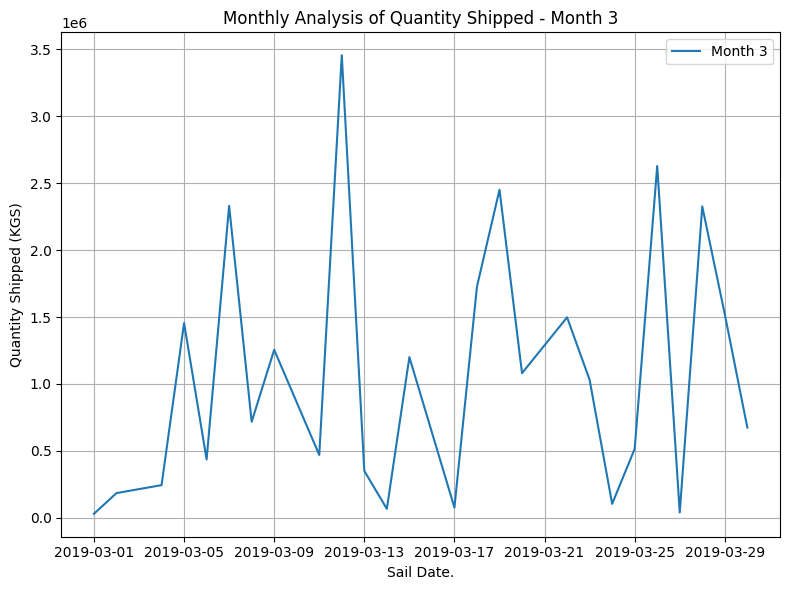

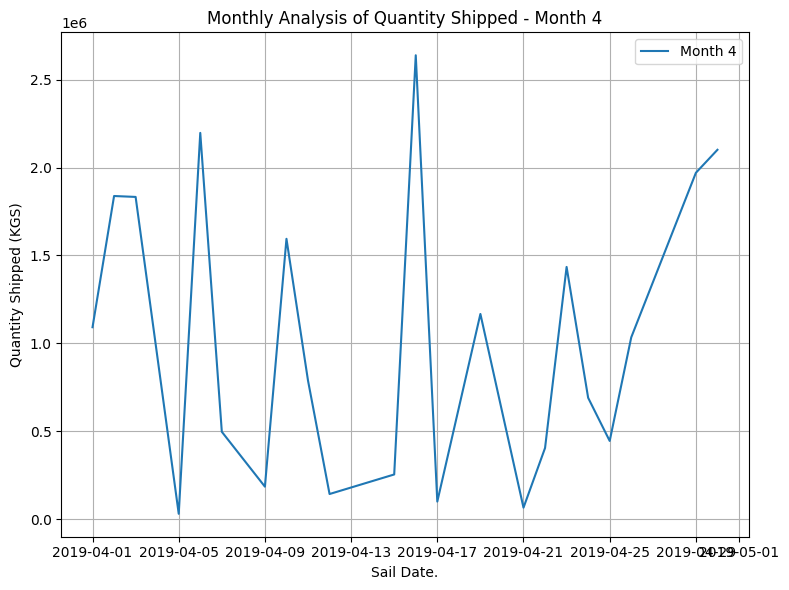

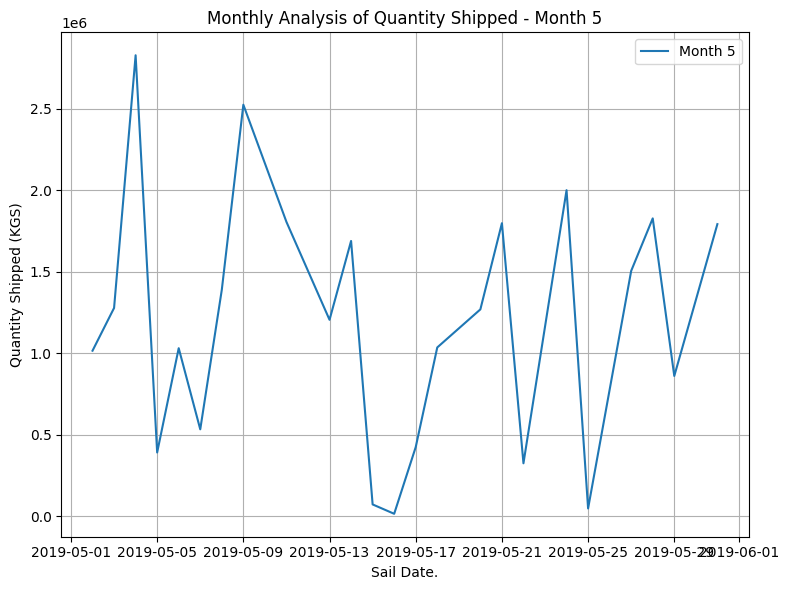

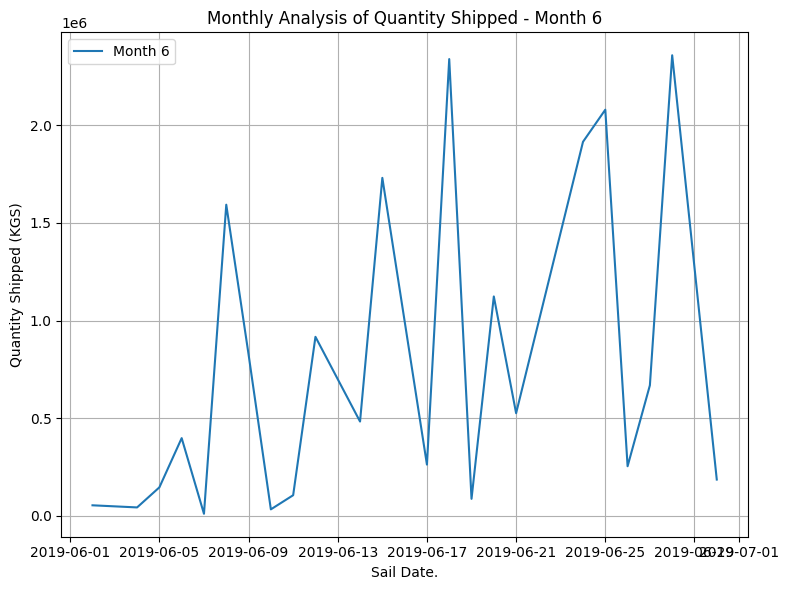

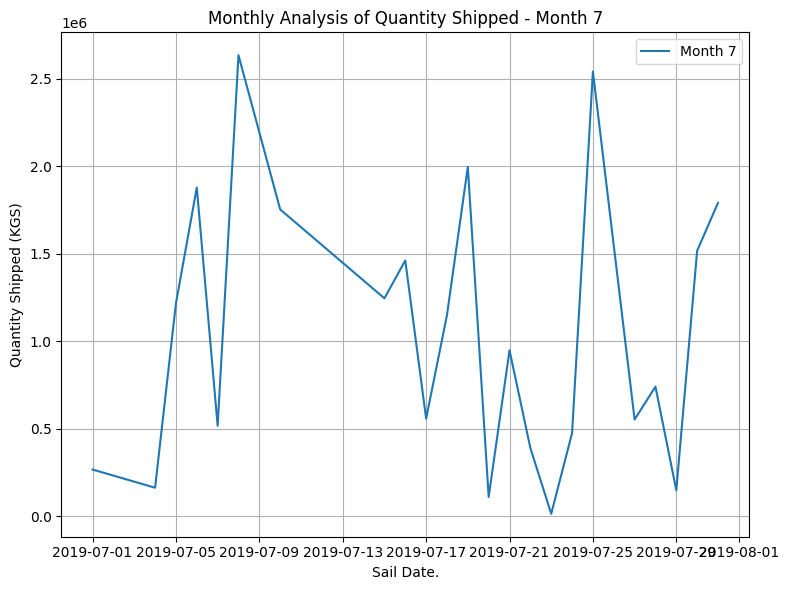

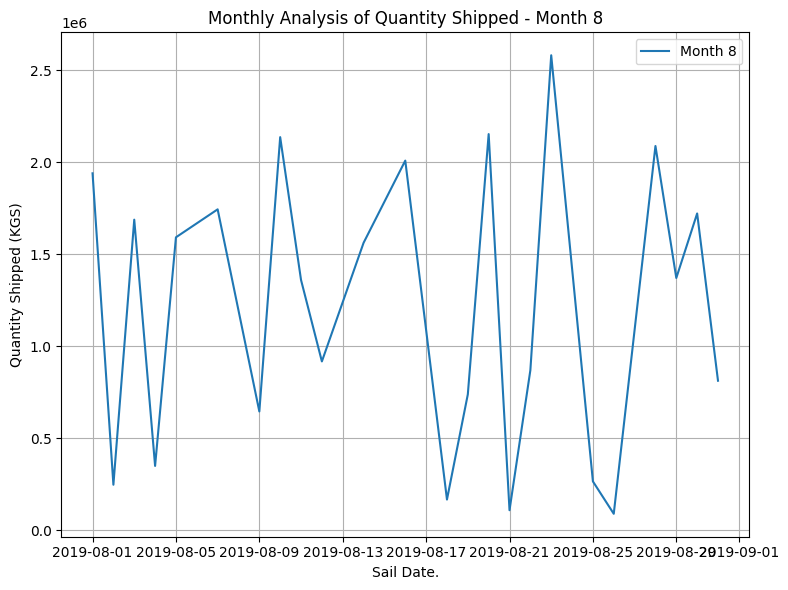

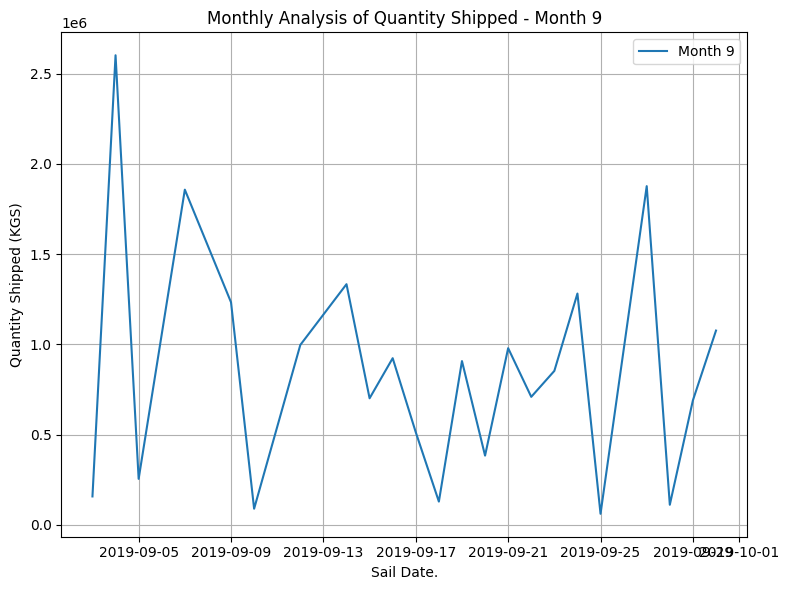

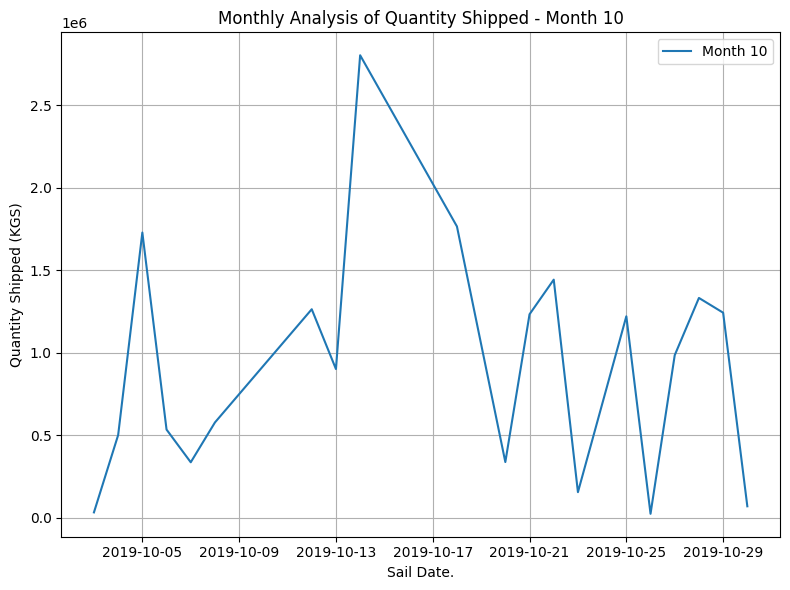

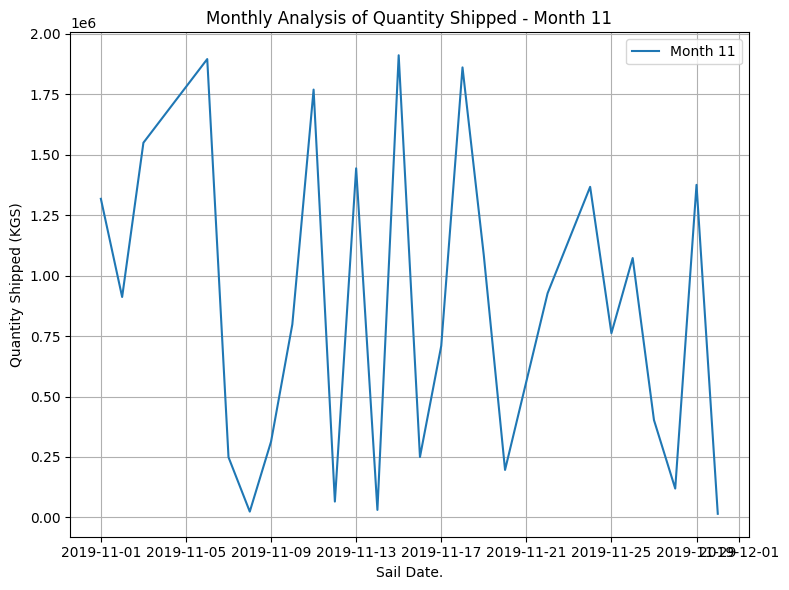

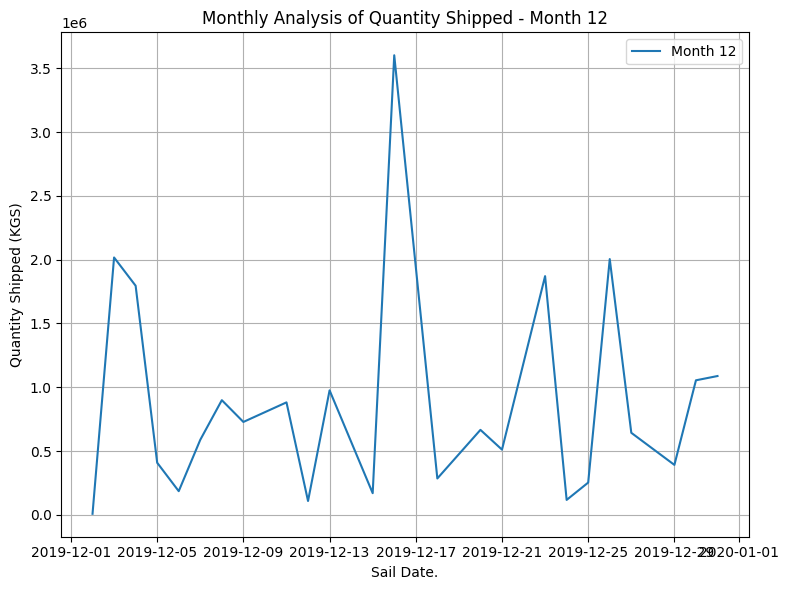

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if the column containing the date information is datetime
if 'Sail Date.' in daily_sales.columns:
    # Convert 'Sail Date.' to datetime with a specific format if needed
    try:
        daily_sales['Sail Date.'] = pd.to_datetime(daily_sales['Sail Date.'], format='%Y-%m-%d')
    except ValueError:
        print("Error: Unable to convert 'Sail Date.' to datetime. Check the date format.")

    # Check if conversion was successful
    if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
        # Extract year and month from the 'Sail Date.' column
        daily_sales['Month'] = daily_sales['Sail Date.'].dt.month

        # Iterate over each month
        for month in range(1, 13):
            # Filter the data for the current month
            month_data = daily_sales[daily_sales['Month'] == month]

            # Plotting
            plt.figure(figsize=(8, 6))
            plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Month {month}')
            plt.xlabel('Sail Date.')
            plt.ylabel('Quantity Shipped (KGS)')
            plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    else:
        print("Error: 'Sail Date.' column could not be converted to datetime.")
else:
    print("Error: 'Sail Date.' column not found in the DataFrame.")


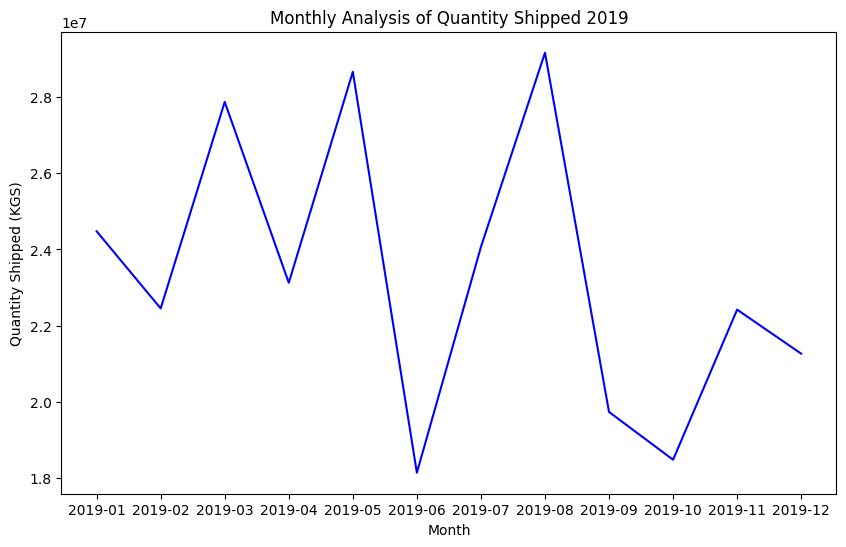

In [75]:
import matplotlib.pyplot as plt

# Assuming daily_sales is your DataFrame containing the sales data

# Check if the 'Sail Date.' column is datetime
if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Extract year and month from the 'Sail Date.' column
    daily_sales['Month'] = daily_sales['Sail Date.'].dt.to_period('M')

    # Group the data by month and calculate the total quantity shipped for each month
    monthly_data = daily_sales.groupby('Month')['QTY.(KGS)'].sum()

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plotting each quarter with a different color
    plt.plot(monthly_data.index.astype(str), monthly_data.values, marker='', linestyle='-', color='blue')  # Plot all months in blue
    
    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Quantity Shipped (KGS)')
    plt.title('Monthly Analysis of Quantity Shipped 2019')

    # Show the plot
    plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


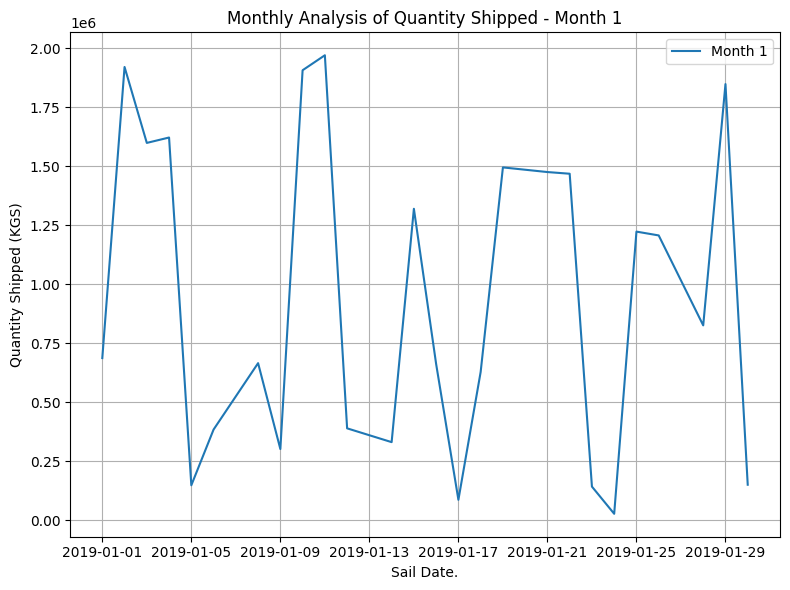

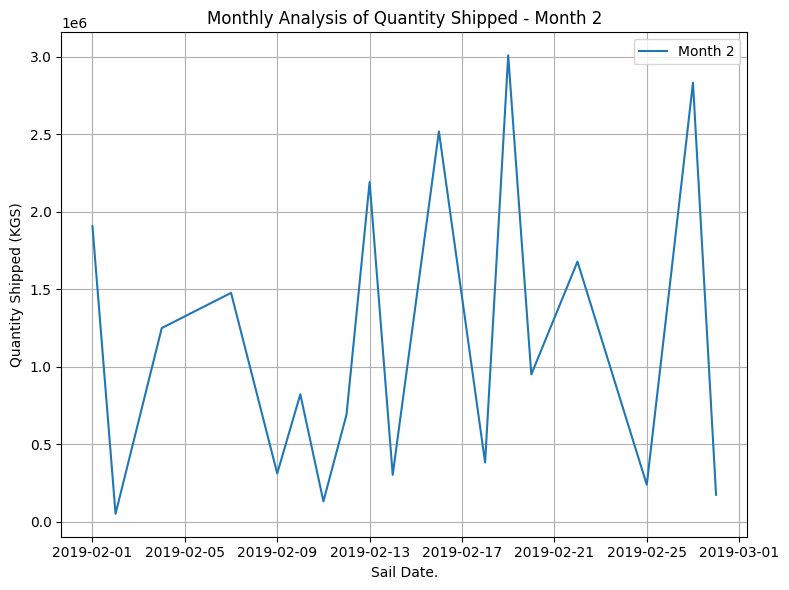

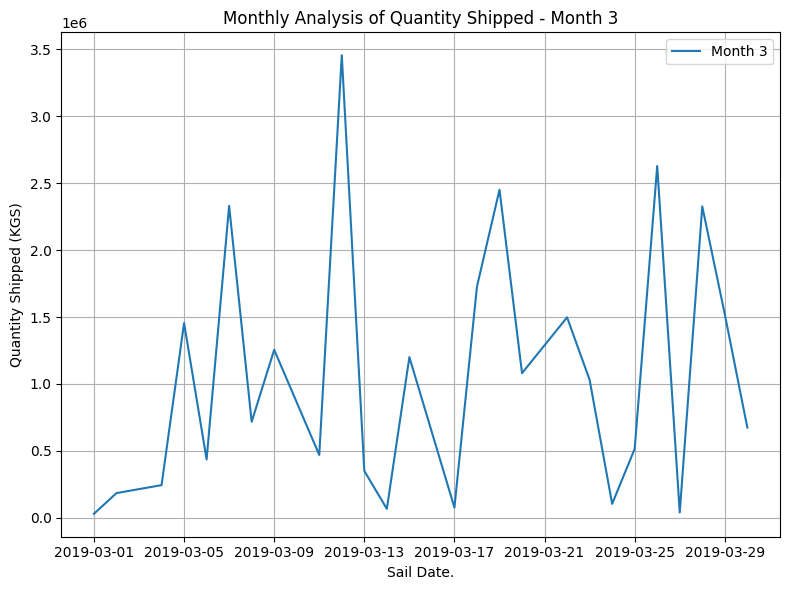

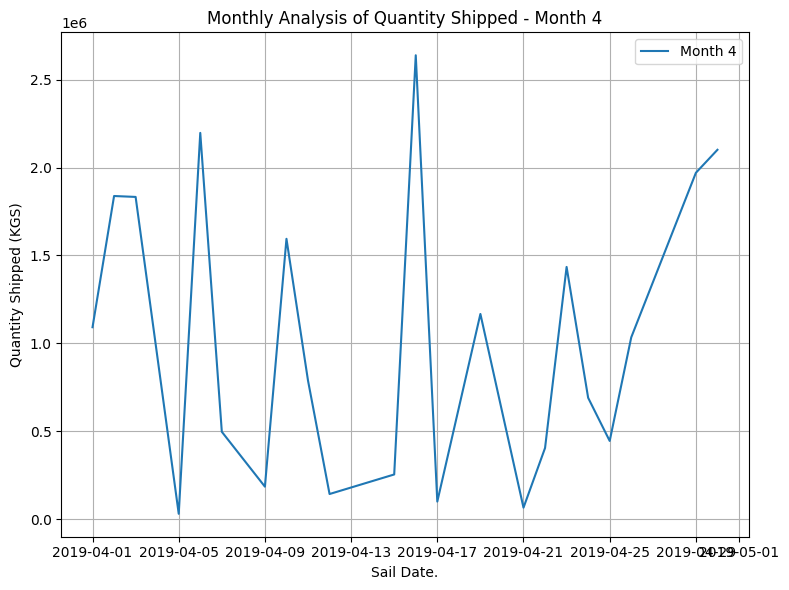

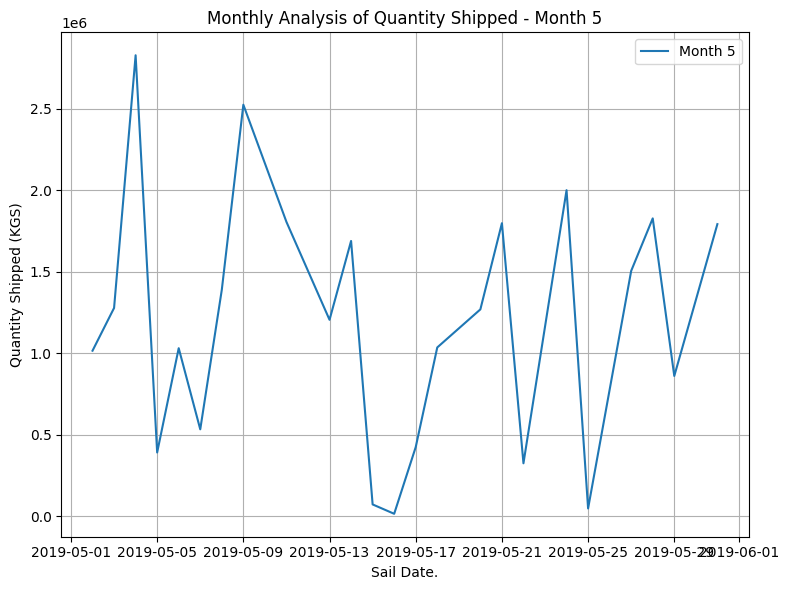

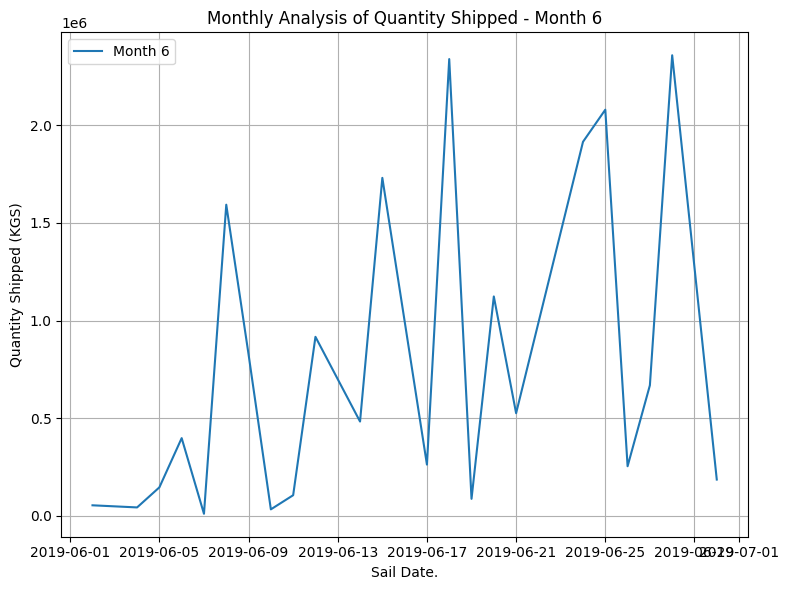

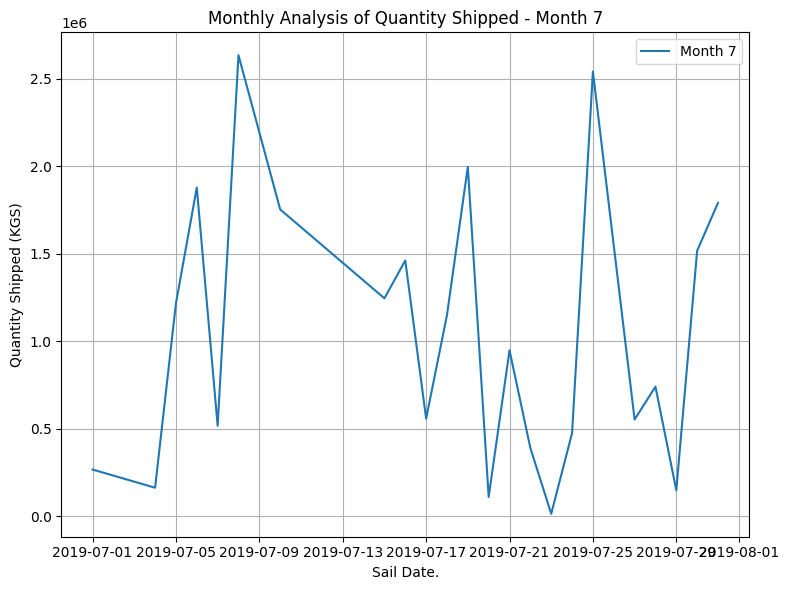

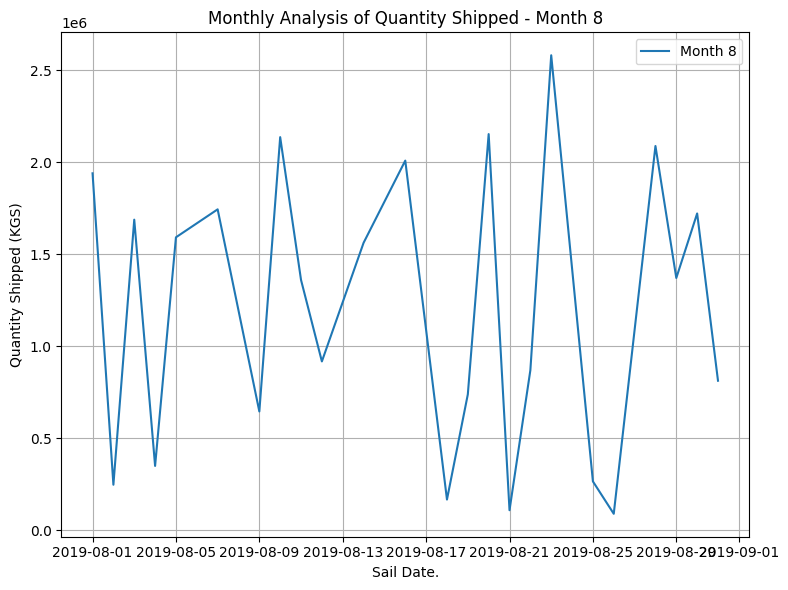

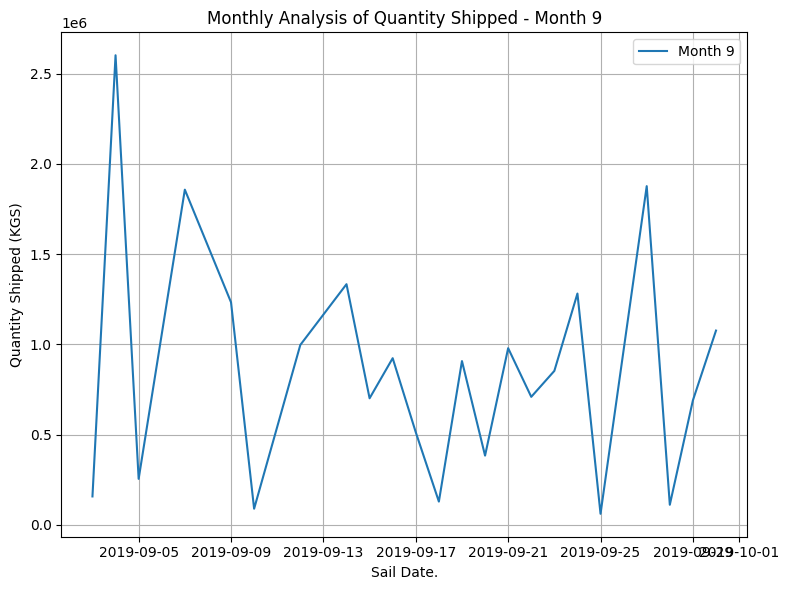

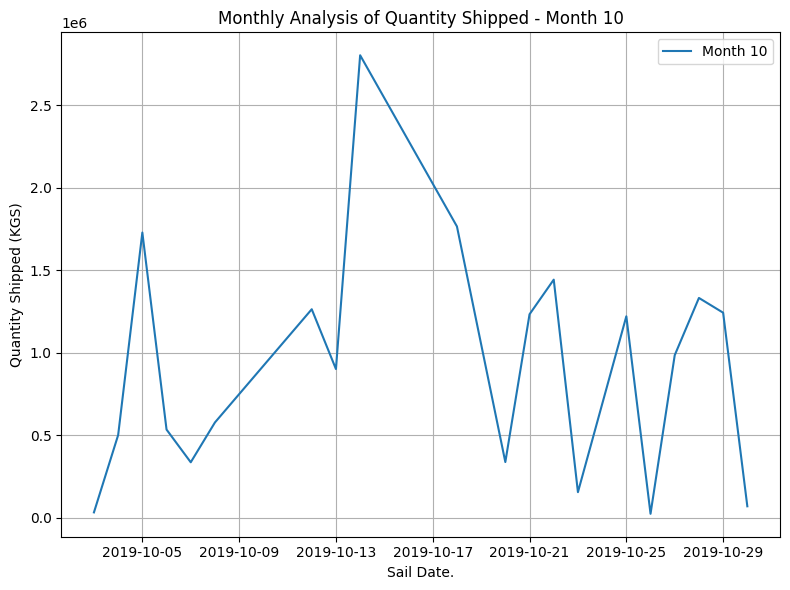

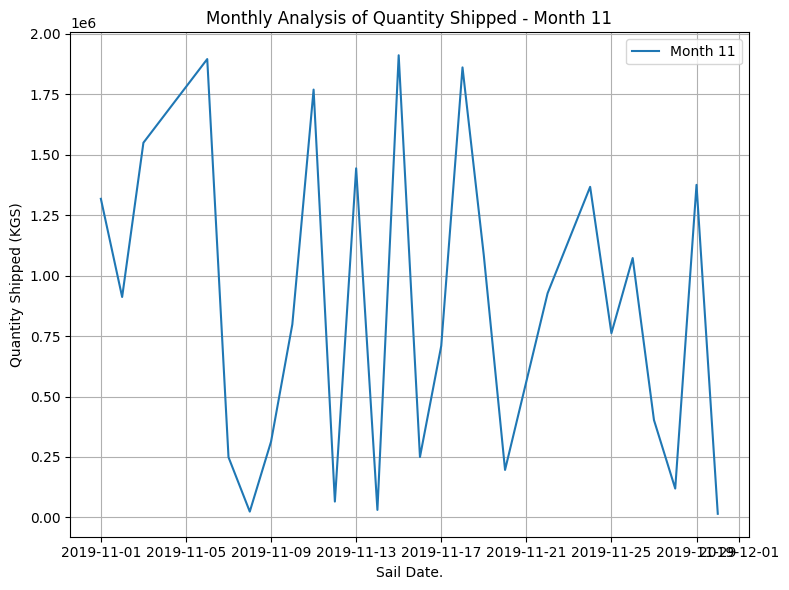

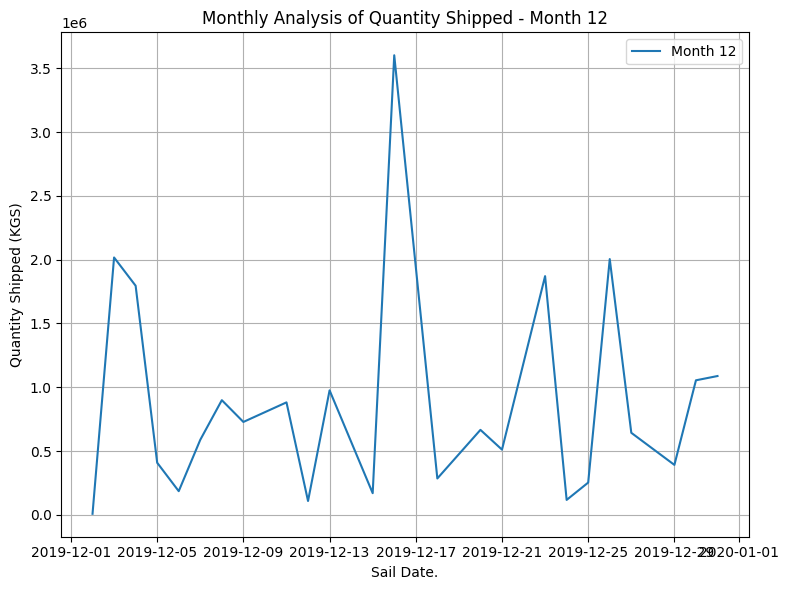

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if the column containing the date information is datetime
if 'Sail Date.' in daily_sales.columns:
    # Convert 'Sail Date.' to datetime with a specific format if needed
    try:
        daily_sales['Sail Date.'] = pd.to_datetime(daily_sales['Sail Date.'], format='%Y-%m-%d')
    except ValueError:
        print("Error: Unable to convert 'Sail Date.' to datetime. Check the date format.")

    # Check if conversion was successful
    if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
        # Extract year and month from the 'Sail Date.' column
        daily_sales['Month'] = daily_sales['Sail Date.'].dt.month

        # Iterate over each month
        for month in range(1, 13):
            # Filter the data for the current month
            month_data = daily_sales[daily_sales['Month'] == month]

            # Plotting
            plt.figure(figsize=(8, 6))
            plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Month {month}')
            plt.xlabel('Sail Date.')
            plt.ylabel('Quantity Shipped (KGS)')
            plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    else:
        print("Error: 'Sail Date.' column could not be converted to datetime.")
else:
    print("Error: 'Sail Date.' column not found in the DataFrame.")


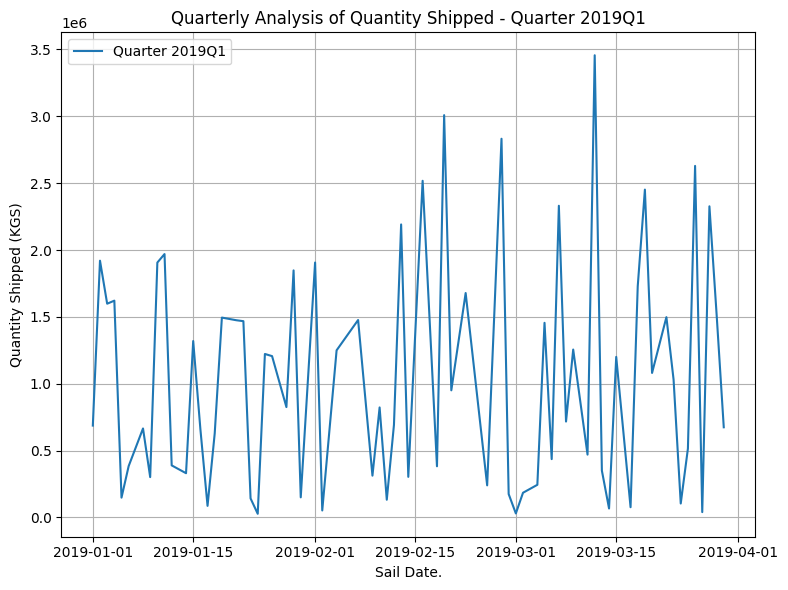

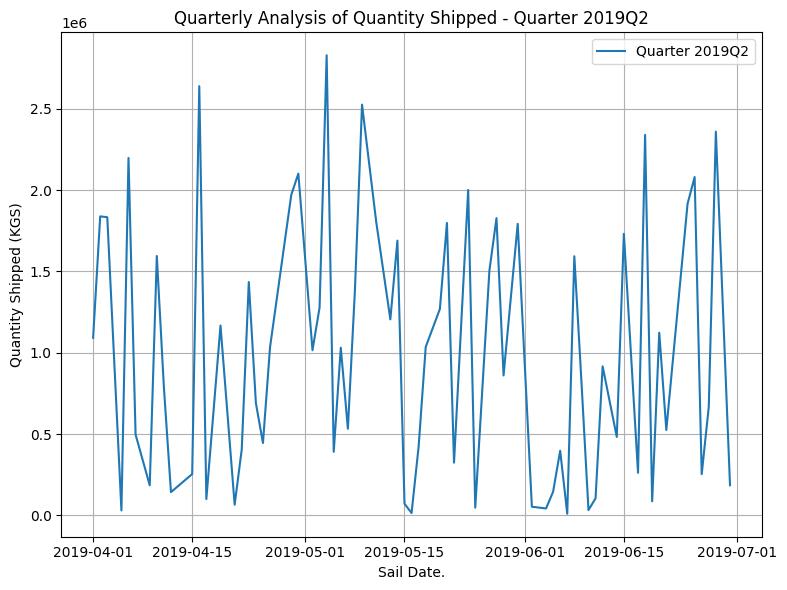

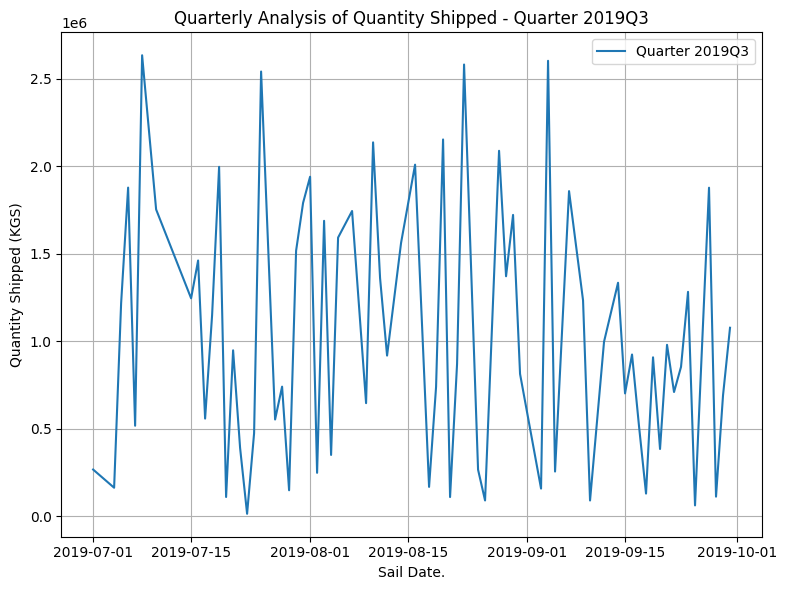

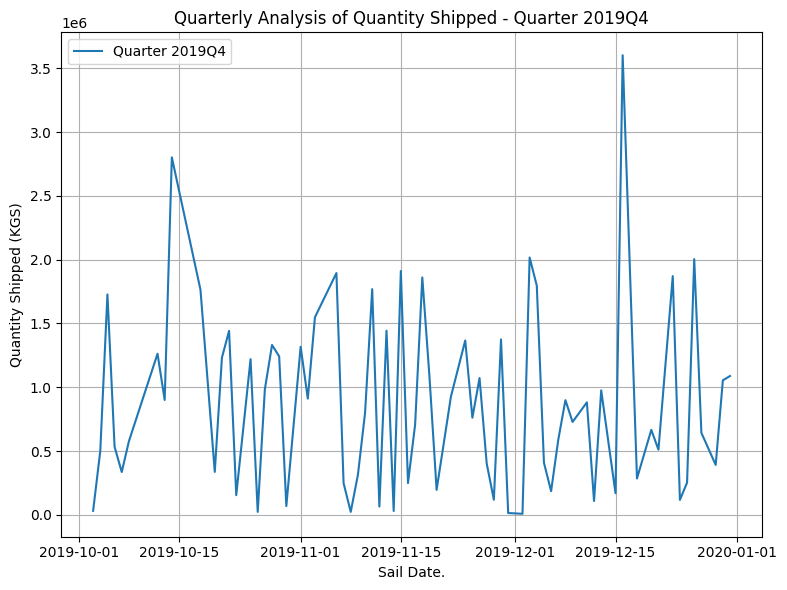

In [77]:


# Assuming daily_sales is your DataFrame containing the sales data
# Replace 'Sail Date.' with the actual name of your date column

# Check if the column containing the date information is datetime
if 'Sail Date.' in daily_sales.columns and pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Group the data by quarters
    daily_sales['Quarter'] = daily_sales['Sail Date.'].dt.to_period('Q')

    # Iterate over each quarter
    for quarter in daily_sales['Quarter'].unique():
        # Filter the data for the current quarter
        quarter_data = daily_sales[daily_sales['Quarter'] == quarter]

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Quarter {quarter}')
        plt.xlabel('Sail Date.')
        plt.ylabel('Quantity Shipped (KGS)')
        plt.title(f'Quarterly Analysis of Quantity Shipped - Quarter {quarter}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


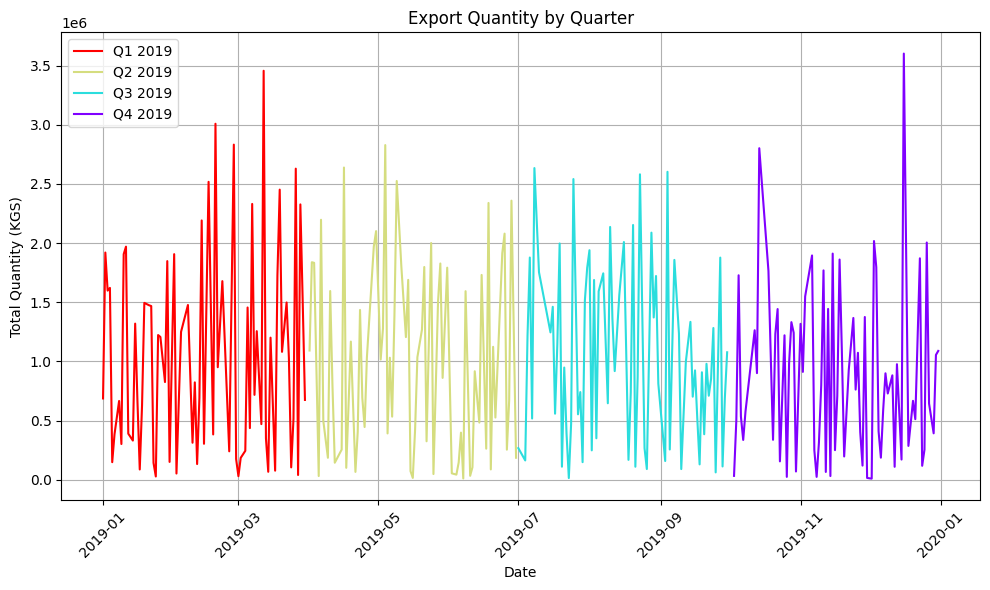

In [78]:
import matplotlib.cm as cm

unique_quarters = daily_sales['Quarter'].unique()

# Create a color map for quarters
colors = cm.rainbow_r(np.linspace(0, 1, len(unique_quarters)))

# Plot each quarter's export with different color
plt.figure(figsize=(10, 6))
for i, quarter in enumerate(unique_quarters):
    quarter_data = daily_sales[daily_sales['Quarter'] == quarter]
    plt.plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='', label=f'Q{quarter.quarter} {quarter.year}', color=colors[i])

plt.title('Export Quantity by Quarter')
plt.xlabel('Date')
plt.ylabel('Total Quantity (KGS)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

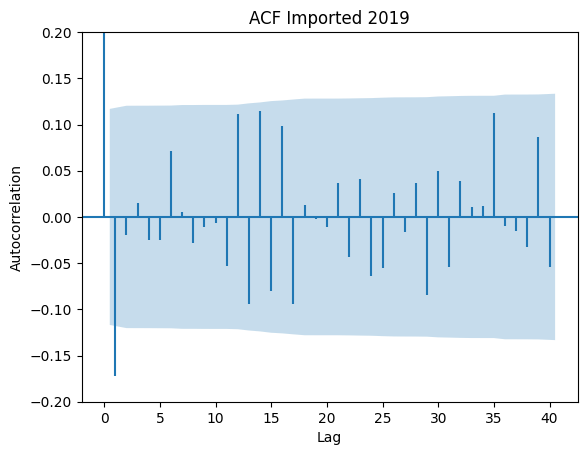

In [79]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming daily_sales is your DataFrame containing the sales data

# Specify the column name
sail_date_column = 'Sail Date.'

# Check if the specified column exists in the DataFrame
if sail_date_column in daily_sales.columns:
    # Attempt to convert 'Sail Date.' to datetime
    try:
        daily_sales[sail_date_column] = pd.to_datetime(daily_sales[sail_date_column])
    except ValueError as e:
        # Print the error message and problematic values
        print(f"Error: Unable to convert '{sail_date_column}' to datetime.")
        print("Problematic values:")
        problematic_values = daily_sales.loc[~daily_sales[sail_date_column].apply(lambda x: pd.to_datetime(str(x), errors='coerce')).notna(), sail_date_column]
        print(problematic_values)
    
    # Check if the column was successfully converted to datetime
    if pd.api.types.is_datetime64_any_dtype(daily_sales[sail_date_column]):
        # Set 'Sail Date.' column as index
        daily_sales.set_index(sail_date_column, inplace=True)
        
        # Increase figure size
        plt.figure(figsize=(12, 8))

        # Plot the autocorrelation function (ACF)
        plot_acf(daily_sales['QTY.(KGS)'], lags=40, marker=None)  # Adjust lags as needed
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title('ACF Imported 2019')
        
        # Set y-axis limits
        plt.ylim(-0.20, 0.20)
        
        plt.show()
    else:
        print(f"Error: '{sail_date_column}' column exists but could not be converted to datetime.")
else:
    print(f"Error: '{sail_date_column}' column not found in the DataFrame.")
